# Assignment: Distinguish Two Categories

## Data description

### Corpus: All posts up to Jan 12th on www.thelayoff.com

### 1. Motivation

#### For what purpose was the dataset created?

Thelayoff.com provides the following rationale for its existence: 

"The workforce reduction process is inherently secretive and plagued with rumors. Companies release little or no details while planning such resource actions. On the other hand, the lives of each of us may be greatly impacted by these top-secret decisions - hence all the anxiety that workers may experience.Enter TheLayoff.com - The purpose of this site is to provide a space for anyone who'd like to discuss the possibility, likelihood or impacts of layoffs in a company of interest."

#### Who created the dataset?

The raw data came in organically as people posted about layoffs. I then scraped and tabulated it. 

### 2. Composition

#### What do the instances that comprise the dataset represent?

Each observation in the dataset represents one forum post on the site. All text from the title, content, and replies have been combined into a single document. The text has metadata including the company the post is about, the number of replies, the date, etc. The companies, in turn, have metadata like industry, stock ticker (if available), revenue information, etc.

#### How many instances are there in total?

There are just over 250 thousand posts on the forum, from just over 37 thousand companies. The distribution of posts and words across companies almost perfectly follows a power law:

<img src="../img/post_dist.png" width="40%">

<img src="../img/word_dist.png" width="40%">

#### Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set?

The data include every post on the site, not a sample. However, it's not entirely clear what population is represented. Given the types of companies heavily represented, I assume this is a population of primarily white-collar workers experiencing insecurity (or getting laid off) in their employment. Then, the type of people who would post about this on forums likely don't perfectly represent the population of workers at these companies.

#### Is there a label or target associated with each instance

There are several labels/targets that could be used, depending on the goal of the analysis. One could try to predict the company a post is about (which is what I do in this notebook), but this is kind of boring. More interesting might be to try and predict industry, which is given in the data, or to predict some other outside company-level variable, like within-company wage inequality or occurrences of actual layoffs as reported in the news.

#### Is any information missing from individual instances?

I don't think so, but will have to keep looking

#### Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety?

Maybe. There are a lot of angry people on this forum, although curse words are censored with "-"s.

#### Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset?

No. In fact, all posts are completely anonymous, which is both a blessing and a curse

#### What mechanisms or procedures were used to collect the data (e.g., hardware apparatus or sensor, manual human curation, software program, software API)? 

I used the rvest R package. Companies on the site are indexed alphabetically. I first scraped the alphabetical index page for the urls of company pages, then scraped the company pages for urls to individual posts, then scraped each post.

#### Over what timeframe was the data collected?

January 2021

#### Was the “raw” data saved in addition to the preprocessed/cleaned/labeled data (e.g., to support unanticipated future uses)?

Yes, I have the raw data in the form of 250k jsons. It's really annoying to work with so I put them into the text-file used below.


----

## Prior guesses about what will distinguish categories

For this exercise, I'm just going to distinguish qualcomm posts from at&t posts which is kind of boring and not the actual point of the data. I expect to find that the names of the companies will be the most distinguishing words, by far

In [84]:
import os
import csv

from tqdm import tqdm
from collections import Counter

import nltk
from nltk.corpus import stopwords

import numpy as np
import matplotlib.pyplot as plt

In [81]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [85]:
data_dir = "/home/jovyan/work/Dropbox/thelayoff"
input_file = os.path.join(data_dir, "all_posts.txt")

 #### Tokenizer function
 
 This function uses the nltk tokenizer and removes a basic set of stopwords from the corpus

In [86]:
def tokenize_and_clean(document):
    tokens = nltk.word_tokenize(document)
    tokens_filtered = [word for word in tokens if word not in stopwords.words('english')]
    return tokens_filtered

In [87]:
qualcomm_counter = Counter()
atandt_counter = Counter()
qualcomm_companies = 0
atandt_companies = 0
qualcomm_posts = []
atandt_posts = []

with open(input_file) as file:
    rd = csv.reader(file, delimiter = "\t", quotechar = '"')
    for row in tqdm(rd):
        
        company = row[1]
        
        # only deal with these qc and at&t
        if company == 'https://www.thelayoff.com/qualcomm':
            qualcomm_companies += 1
            tokens = tokenize_and_clean(row[4])
            qualcomm_counter.update(tokens)
            qualcomm_posts.append(row[4])
            
        elif company == 'https://www.thelayoff.com/at-and-t':
            atandt_companies += 1
            tokens = tokenize_and_clean(row[4])
            atandt_counter.update(tokens)
            atandt_posts.append(row[4])
            

250837it [10:08, 412.55it/s]


In [88]:
print(qualcomm_companies)
print(atandt_companies)

8599
8712


In [89]:
qualcomm_counter.most_common(10)

[('.', 76991),
 (',', 45161),
 ('I', 18024),
 ('?', 15763),
 ('!', 10912),
 ("'s", 8838),
 ("n't", 8692),
 ('...', 5517),
 (':', 5094),
 (')', 4852)]

In [90]:
atandt_counter.most_common(10)

[('.', 144426),
 (',', 83271),
 ('I', 41800),
 ('?', 22137),
 ('’', 20195),
 ('!', 16621),
 ('T', 16304),
 ('&', 15014),
 ("n't", 12713),
 ("'s", 12312)]

### Analyze vocabulary 

In [91]:
print(vocabulary[:20], vocabulary[-20:])

['*', 'ANOTHER', 'ROUND', 'PLANNED', 'END', 'OF', 'THIS', 'YEAR', 'Additional', 'Layoffs', 'and', 'Cuts', 'to', 'be', 'announced', 'at', 'of', 'this', 'year', '.'] ['mutations', 'evade', 'mutating', 'rate1/1,000', 'Tighter', 'FilmStruck', 'Direct-To-Consumer', 'operandi', 'skankey', 'executives/home', 'Indirect/Authorized', '09.15.2016', '11.15.2016', '04.01.2017', 'AE/RAEs', 'bumping/logging', 'Timelines', '10/1/2016', 'Barista', 'Hustlers']


In [92]:
all_counter = qualcomm_counter + atandt_counter
vocabulary = list(all_counter.keys())
len(vocabulary)

98903

In [93]:
# check Zipf's law
Counter(all_counter.values()).most_common(10)

[(1, 56743),
 (2, 11317),
 (3, 5420),
 (4, 3426),
 (5, 2328),
 (6, 1748),
 (7, 1429),
 (8, 1164),
 (9, 937),
 (10, 767)]

In [94]:
qc_tokens = sum(qualcomm_counter.values())
at_tokens = sum(atandt_counter.values())
qc_tokens, at_tokens

(1045710, 1965048)

In [96]:
# 10 words make up about 37% of the collection

cumulative_proportion = 0.0

for w, c in all_counter.most_common(100):
    proportion = c / (qc_tokens + at_tokens)
    cumulative_proportion += proportion
    
    print("{}\t{:.4f}\t{:.1f}%\t{}".format(c, proportion, 100 * cumulative_proportion, w))

221417	0.0735	7.4%	.
128432	0.0427	11.6%	,
59824	0.0199	13.6%	I
37900	0.0126	14.9%	?
27533	0.0091	15.8%	!
22323	0.0074	16.5%	’
21405	0.0071	17.2%	n't
21150	0.0070	17.9%	's
16528	0.0055	18.5%	T
16221	0.0054	19.0%	&
15207	0.0051	19.5%	company
14989	0.0050	20.0%	get
14572	0.0048	20.5%	The
13070	0.0043	20.9%	people
12524	0.0042	21.4%	...
12230	0.0041	21.8%	)
12230	0.0041	22.2%	``
12224	0.0041	22.6%	work
11715	0.0039	23.0%	AT
11604	0.0039	23.4%	''
11366	0.0038	23.7%	(
11334	0.0038	24.1%	like
11050	0.0037	24.5%	would
10468	0.0035	24.8%	It
9596	0.0032	25.1%	:
9591	0.0032	25.5%	one
9223	0.0031	25.8%	time
9021	0.0030	26.1%	$
8894	0.0030	26.4%	job
8739	0.0029	26.7%	years
8345	0.0028	26.9%	If
8257	0.0027	27.2%	know
7741	0.0026	27.5%	They
7739	0.0026	27.7%	You
7281	0.0024	28.0%	going
7239	0.0024	28.2%	good
7220	0.0024	28.4%	-
7167	0.0024	28.7%	go
7070	0.0023	28.9%	employees
6948	0.0023	29.1%	%
6379	0.0021	29.4%	think
6023	0.0020	29.6%	many
5999	0.0020	29.8%	make
5985	0.0020	30.0%	year
5969	0.0020	

In [97]:
word_counts = np.zeros((len(vocabulary), 2))
for row, word in enumerate(vocabulary):
    word_counts[row,0] = qualcomm_counter[word]
    word_counts[row,1] = atandt_counter[word]

In [98]:
word_counts[:10,:]

array([[1.17e+03, 5.34e+02],
       [5.00e+00, 6.00e+00],
       [1.00e+00, 3.00e+00],
       [1.00e+00, 1.00e+00],
       [1.10e+01, 1.00e+01],
       [2.50e+01, 1.14e+02],
       [3.10e+01, 6.30e+01],
       [6.00e+00, 1.60e+01],
       [5.00e+00, 7.00e+00],
       [2.36e+02, 4.58e+02]])

In [99]:
# .sum(axis=0) sums along columns (ie [row,col])

company_sums = word_counts.sum(axis=0)

# Use np.newaxis to streeeeetch an array to the shape of
# another array
word_proportions = word_counts / company_sums[np.newaxis,:]

company_sums

array([1045710., 1965048.])

In [100]:
word_proportions[:10,:]

array([[1.11885704e-03, 2.71749087e-04],
       [4.78144036e-06, 3.05336053e-06],
       [9.56288072e-07, 1.52668026e-06],
       [9.56288072e-07, 5.08893421e-07],
       [1.05191688e-05, 5.08893421e-06],
       [2.39072018e-05, 5.80138500e-05],
       [2.96449302e-05, 3.20602856e-05],
       [5.73772843e-06, 8.14229474e-06],
       [4.78144036e-06, 3.56225395e-06],
       [2.25683985e-04, 2.33073187e-04]])

In [101]:
# What are the odds? p(w) / p(not w) = p(w) / (1-p(w))

word_odds = word_counts / (company_sums[np.newaxis,:] - word_counts)
word_odds[:10,:]

array([[1.12011029e-03, 2.71822955e-04],
       [4.78146322e-06, 3.05336985e-06],
       [9.56288987e-07, 1.52668260e-06],
       [9.56288987e-07, 5.08893680e-07],
       [1.05192794e-05, 5.08896011e-06],
       [2.39077734e-05, 5.80172158e-05],
       [2.96458091e-05, 3.20613134e-05],
       [5.73776136e-06, 8.14236104e-06],
       [4.78146322e-06, 3.56226664e-06],
       [2.25734930e-04, 2.33127523e-04]])

In [102]:
# get the *log* frequency of words to use as the x-axis for plots

# axis 0 in [row,col] is along rows, axis 1 is along columns
# to be clear: sum -> *along* -> columns to get the sum for each row

type_frequencies = word_counts.sum(axis=1)
log_type_frequencies = np.log(type_frequencies)

In [103]:
def plot_words(y_value):
    y_std = y_value.std()
    plt.figure(figsize=(6,18))
    plt.scatter(log_type_frequencies, y_value, alpha=0.3)
    for i in range(len(vocabulary)):
        if np.abs(y_value[i]) > 2 * y_std:
            plt.text(log_type_frequencies[i], y_value[i], vocabulary[i])
    plt.show()

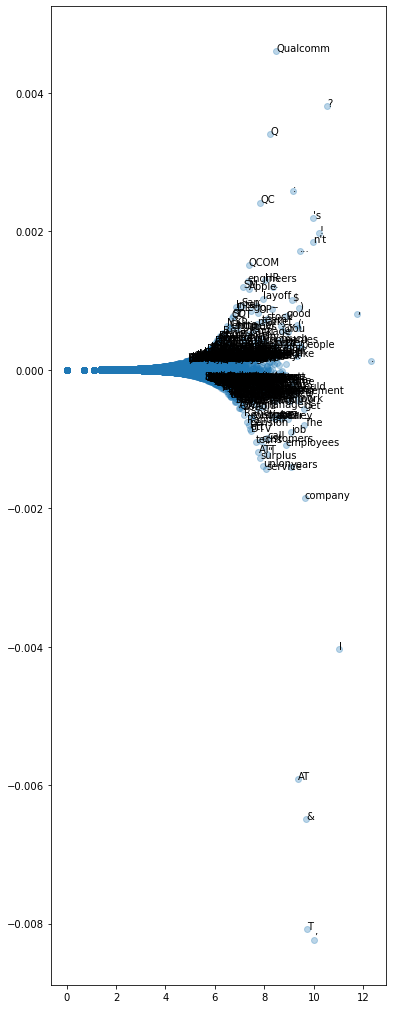

In [104]:
# the difference in proportion emphasizes high-frequency words
# (low-frequency words are always close to 0)

plot_words(word_proportions[:,0] - word_proportions[:,1])

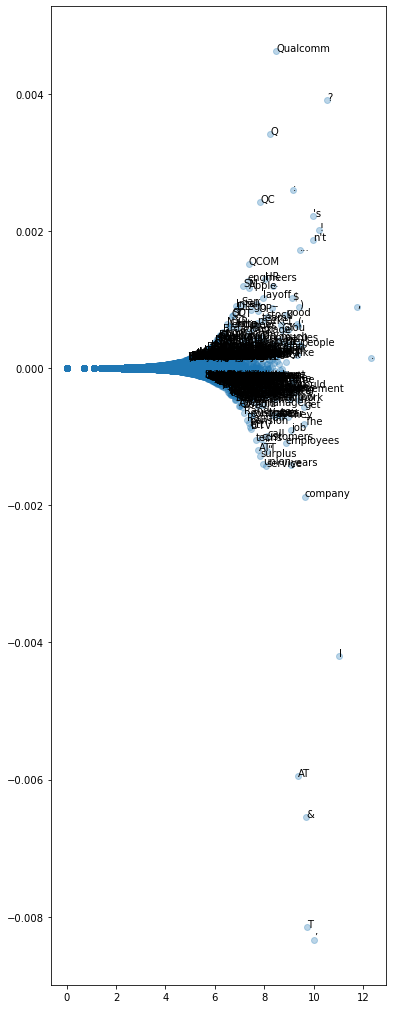

In [105]:
plot_words(word_odds[:,0] - word_odds[:,1])

In [106]:
smoothed_word_counts = word_counts + 1.0
smoothed_company_sums = smoothed_word_counts.sum(axis=0)
smoothed_word_odds = smoothed_word_counts / (smoothed_company_sums[np.newaxis,:] - smoothed_word_counts)
smoothed_word_odds[:10,:]

array([[1.02410092e-03, 2.59278788e-04],
       [5.24197388e-06, 3.39156489e-06],
       [1.74731852e-06, 1.93803426e-06],
       [1.74731852e-06, 9.69016192e-07],
       [1.04840027e-05, 5.32961229e-06],
       [2.27156171e-05, 5.57214817e-05],
       [2.79578291e-05, 3.10094496e-05],
       [6.11564154e-06, 8.23669749e-06],
       [5.24197388e-06, 3.87607604e-06],
       [2.07099764e-04, 2.22438468e-04]])

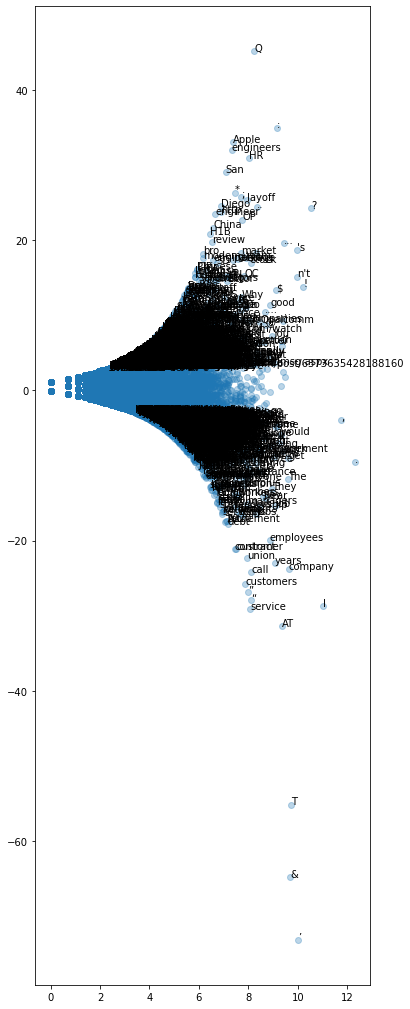

In [107]:
log_odds_difference = np.log(smoothed_word_odds[:,0] / smoothed_word_odds[:,1])
log_odds_variances = 1.0 / smoothed_word_counts[:,0] + 1.0 / smoothed_word_counts[:,1]

plot_words(log_odds_difference / np.sqrt(log_odds_variances))

In [108]:
def sort_words(scores, n=20):
    sorted_pairs = sorted(zip(scores, vocabulary))
    sorted_words = [w for s,w in sorted_pairs]
    print("[most negative] ", ", ".join(sorted_words[:n]))
    print("...")
    print(", ".join(sorted_words[-n:]), " [most positive]")
    
sort_words(log_odds_difference / np.sqrt(log_odds_variances), 100)

[most negative]  ’, &, T, AT, service, I, “, ”, customers, call, company, years, union, customer, contract, employees, debt, TV, retirement, 2020, told, services, techs, jobs, network, benefits, center, wireless, leadership, store, us, job, training, managers, retail, payroll, calls, age, strike, year, pay, workers, Tech, numbers, Union, Verizon, retire, lump, content, They, fiber, sum, IBM, pension, dividend, stores, quarter, surplus, org, The, internet, anyone, month, eligible, streaming, offered, craft, ATT, sales, centers, contractors, outsourced, reps, seniority, severance, said, outsourcing, legacy, paying, We, members, 75, location, 401k, Business, every, states, John, tv, areas, 1st, nothing, contracts, 6, Our, media, day, equipment, cable, field
...
sucks, share, CE, 'll, Austin, shares, Sr., awesome, white, lawyers, Broadcom, Do, please, mortgage, Trump, bay, good, SW, Paul, Please, N, prices, retention, Is, guy, patents, vest, software, HA, server, forum, Why, US, Sr, estate

All of this looks roughly as expected. Namely, the main differentiator between the two companies is their names. Some other interesting stuff appears near the edges, though... like "union" and "retirement" as a strong classifier for AT&T, and "China", "Chinese", and "Indians" appearing on the Qualcom side...

## Naive Bayes

In [109]:
# turn counts into probability with Dirichlet smoothing

def log_prob(word, counts, total, smoothing=0.1):
    prob = (counts[word] + smoothing) / (total + vocab_size * smoothing)
    return np.log( prob ) 

In [114]:
vocab_size = len(vocabulary)
vocab_set = set(vocabulary)

def compare_tokens(doc, smoothing=1):
    total = 0
    for token in tokenize_and_clean(doc):
        if token in vocab_set:
            ds_log_prob = log_prob(token, qualcomm_counter, qc_tokens, smoothing)
            stat_log_prob = log_prob(token, atandt_counter, at_tokens, smoothing)
            diff = ds_log_prob - stat_log_prob
            total += diff
            print(f"{ds_log_prob:.02f}\t{stat_log_prob:.02f}\t{diff:.02f}\t{token}")
        else:
            print("skipping ", token)
    print(total)

In [115]:
compare_tokens("Q SUCKS")

-5.75	-9.55	3.80	Q
-13.26	-13.85	0.59	SUCKS
4.388692098235754


In [116]:
compare_tokens("AT&T SUCKS")

-10.34	-5.17	-5.17	AT
-6.85	-4.92	-1.93	&
-8.53	-4.84	-3.69	T
-13.26	-13.85	0.59	SUCKS
-10.199703558001554


In [117]:
compare_tokens(qualcomm_posts[1])

-6.75	-9.09	2.35	Apple
-5.75	-9.55	3.80	Q
-11.65	-12.34	0.69	benefited
-9.96	-10.37	0.40	relationship
-13.26	-13.44	0.18	Articles
-5.64	-5.65	0.01	like
-5.88	-5.78	-0.10	one
-7.13	-7.26	0.13	give
-9.72	-9.99	0.27	proof
-10.19	-11.77	1.58	dispute
-10.95	-10.73	-0.22	pointless
-9.58	-10.00	0.42	economic
-8.02	-8.04	0.02	sense
-6.75	-9.09	2.35	Apple
-5.47	-14.54	9.07	Qualcomm
-11.87	-12.59	0.72	mutually
-11.39	-11.50	0.11	beneficial
-9.96	-10.37	0.40	relationship
-3.23	-3.21	-0.02	,
-8.37	-8.44	0.07	behind
-10.19	-11.77	1.58	dispute
-9.67	-9.21	-0.46	lies
-10.55	-10.61	0.06	ego
-3.23	-3.21	-0.02	,
-12.00	-12.06	0.05	urge
-10.45	-11.83	1.38	dominate
-3.23	-3.21	-0.02	,
-13.26	-14.54	1.28	politics…
-9.22	-8.60	-0.63	basically
-7.93	-7.57	-0.36	everything
-9.58	-10.00	0.42	economic
-8.52	-8.26	-0.27	interest
-6.75	-7.09	0.34	companies
-2.70	-2.66	-0.04	.
-6.75	-9.09	2.35	Apple
-12.56	-11.83	-0.73	demanded
-9.27	-9.18	-0.09	payment
-8.70	-8.33	-0.37	order
-5.47	-5.31	-0.16	get
-7.85	-14.54	6.

In [118]:
compare_tokens(atandt_posts[1])

-8.27	-8.56	0.29	Did
-11.87	-10.48	-1.39	marketplace
-6.39	-6.47	0.08	need
-7.06	-6.73	-0.33	another
-11.18	-8.84	-2.34	Netflix
-4.29	-4.54	0.25	?
-13.95	-10.67	-3.28	Content
-9.57	-10.96	1.39	commodity
-12.85	-12.75	-0.10	plethora
-2.70	-2.66	-0.04	.
-7.00	-7.25	0.26	How
-6.33	-6.25	-0.07	many
-9.37	-8.70	-0.66	shows
-9.78	-10.01	0.23	junk
-11.47	-10.07	-1.39	movies
-4.29	-4.54	0.25	?
-7.52	-7.43	-0.09	When
-6.83	-6.56	-0.27	last
-5.92	-5.81	-0.11	time
-8.74	-8.60	-0.14	saw
-8.39	-8.72	0.34	quality
-11.12	-11.04	-0.07	motion
-9.89	-9.75	-0.14	picture
-10.08	-9.93	-0.15	released
-4.29	-4.54	0.25	?
-13.95	-10.67	-3.28	Content
-8.88	-8.34	-0.54	non
-8.05	-7.86	-0.19	stop
-11.87	-11.90	0.03	vomit
-7.39	-7.25	-0.14	coming
-7.25	-6.92	-0.33	days
-13.26	-12.34	-0.91	angles
-2.70	-2.66	-0.04	.
-8.62	-9.00	0.38	Great
-6.88	-6.60	-0.29	business
-8.98	-9.39	0.41	jump
-2.70	-2.66	-0.04	.
-11.18	-8.84	-2.34	Netflix
-9.34	-8.92	-0.42	putting
-13.95	-13.85	-0.10	cr_p
-6.83	-6.56	-0.27	last
-6.87	-6.

From this it looks like the two companies can be differentiated because Qualcomm is a bit more tech-product focussed, while AT&T is more service focussed. That's why words like netflix, marketplace, movies and content lean towards AT&T while words like apply, chips, Infineon, and model lean towards Qualcomm. It also looks like Qualcomm is involved in a legal dispute, although it's interesting that these words (eg. lawsuit) are not particularly pulled towards Qualcomm and appear in both corpuses. 

## As a classifier